<a href="https://colab.research.google.com/github/muksmuks/computer_vision/blob/master/project_6/Week6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 

tf.keras.backend.clear_session()

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

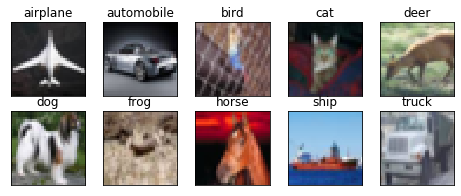

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

In [0]:
layers.Conv2D?

In [0]:
input = keras.Input(shape=(32, 32, 3), name='img')

##Normal Convolution
x = layers.Conv2D(32, 3, activation='relu')(input)


##Depthwise Separable convolution
x = layers.SeparableConv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Dropout(0.25)(x)

##Spatially Seperable
x = layers.Conv2D(32, (1,3), activation='relu')(x)
x = layers.Conv2D(32, (3,1), activation='relu')(x)


##Grouped Convolution
y = layers.Conv2D(32, 5, activation='relu')(x)
z = layers.Conv2D(32, 3, activation='relu')(x)
z = layers.Conv2D(32, 3, activation='relu')(z)

x = layers.add([y, z])
x = layers.Dropout(0.25)(x)

##Grouped Conv
##dilation=2
m = layers.Conv2D(32, 3, strides=2 ,  activation='relu')(x)
##dilation=1
t = layers.Conv2D(32, 3, activation='relu')(x)
t = x = layers.MaxPooling2D()(t)

x = layers.add([m, t])
x = layers.Dropout(0.25)(x)

x = layers.Conv2D(num_classes, 3, activation='relu')(x)
output = layers.Flatten()(x)
model = keras.Model(input, output)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
separable_conv2d_23 (SeparableC (None, 28, 28, 64)   2400        conv2d_162[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_36 (MaxPooling2D) (None, 14, 14, 64)   0           separable_conv2d_23[0][0]        
____________________________________________________________________________________________

Epoch 1/50
391/391 [==============================] - 152s 389ms/step - loss: 4.3686 - acc: 0.1450 - val_loss: 3.6068 - val_acc: 0.1000
Epoch 2/50
391/391 [==============================] - 150s 384ms/step - loss: 3.5119 - acc: 0.1803 - val_loss: 3.4015 - val_acc: 0.2258
Epoch 3/50
391/391 [==============================] - 151s 386ms/step - loss: 3.4325 - acc: 0.2091 - val_loss: 3.2766 - val_acc: 0.2626
Epoch 4/50
391/391 [==============================] - 151s 386ms/step - loss: 3.4197 - acc: 0.2066 - val_loss: 3.3552 - val_acc: 0.2241
Epoch 5/50
391/391 [==============================] - 151s 387ms/step - loss: 3.4030 - acc: 0.2224 - val_loss: 3.3377 - val_acc: 0.2430
Epoch 6/50
391/391 [==============================] - 150s 383ms/step - loss: 3.2673 - acc: 0.2773 - val_loss: 3.1886 - val_acc: 0.3026
Epoch 7/50
391/391 [==============================] - 150s 385ms/step - loss: 3.2614 - acc: 0.2911 - val_loss: 3.3415 - val_acc: 0.2720
Epoch 8/50
391/391 [============================

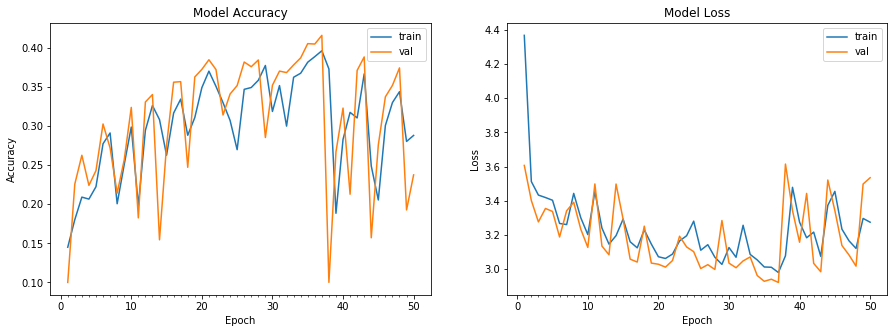

Accuracy on test data is: 23.75


In [49]:
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                epochs = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)

end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))